In [1]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from dmba import plotDecisionTree, classificationSummary, regressionSummary


# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [6]:
# Data Loading


#training data
data_train = pd.read_csv('iris.csv')
data_train.head()



,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [20]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        data_train.drop(columns = "variety"),
                                        data_train['variety'],
                                        train_size= 0.7, # by default 0.75 is the amunt of data for training
                                        random_state = 123
                                                                            )

In [21]:
X_train

,sepal.length,sepal.width,petal.length,petal.width
114,5.8,2.8,5.1,2.4
136,6.3,3.4,5.6,2.4
53,5.5,2.3,4.0,1.3
19,5.1,3.8,1.5,0.3
38,4.4,3.0,1.3,0.2
...,...,...,...,...
17,5.1,3.5,1.4,0.3
98,5.1,2.5,3.0,1.1
66,5.6,3.0,4.5,1.5
126,6.2,2.8,4.8,1.8


In [22]:
y_train

114     Virginica
136     Virginica
53     Versicolor
19         Setosa
38         Setosa
          ...    
17         Setosa
98     Versicolor
66     Versicolor
126     Virginica
109     Virginica
Name: variety, Length: 105, dtype: object

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 114 to 109
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  105 non-null    float64
 1   sepal.width   105 non-null    float64
 2   petal.length  105 non-null    float64
 3   petal.width   105 non-null    float64
dtypes: float64(4)
memory usage: 4.1 KB


In [24]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 72 to 142
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  45 non-null     float64
 1   sepal.width   45 non-null     float64
 2   petal.length  45 non-null     float64
 3   petal.width   45 non-null     float64
dtypes: float64(4)
memory usage: 1.8 KB


In [25]:
# count of each category value and checking categories in training and in test

train_count= y_train.value_counts()
print("Training :\n", train_count)

test_count=y_test.value_counts()
print("\n Test :\n", test_count)


rows_train = len(X_train.axes[0]) 

rows_test = len(X_test.axes[0])

print("\n Porcentaje de casos de cada clase en training", 
      round(train_count[0]/rows_train,2), round(train_count[1]/rows_train,2), round(train_count[2]/rows_train,2))
print("\n Porcentaje de casos de cada clase en test  ", round(test_count[0]/rows_test,2), round(test_count[1]/rows_test,2),round(test_count[2]/rows_test,2))

Training :
 Versicolor    40
Virginica     33
Setosa        32
Name: variety, dtype: int64

 Test :
 Setosa        18
Virginica     17
Versicolor    10
Name: variety, dtype: int64

 Porcentaje de casos de cada clase en training 0.38 0.31 0.3

 Porcentaje de casos de cada clase en test   0.4 0.38 0.22


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# One-hot-encoding of the categoric variables
# ------------------------------------------------------------------------------
# Identification of categoric and numerical variables/column
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()


In [27]:
cat_cols

[]

In [28]:
numeric_cols

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

In [29]:
# One-hot-encoding of the categoric variables
# ------------------------------------------------------------------------------
# Application of one-hot-encoding only to the categorical variables
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

# Once the object ColumnTransformer was created, using the method fit()
# the transforms are applied to the taining and test datasets
# using transform(). Both operations at the same time using fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.fit_transform(X_test)

In [30]:
# Cheking NaN /null values
X_train.isnull().sum()*100/X_train.shape[0]


sepal.length    0.0
sepal.width     0.0
petal.length    0.0
petal.width     0.0
dtype: float64

In [32]:
# Obtaining names of columns for creation of a dataframe
#encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
#labels = np.concatenate([numeric_cols, encoded_cat])
labels = np.concatenate([numeric_cols])

In [33]:
labels

array(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'],
      dtype='<U12')

In [34]:
# Conversion to dataframe
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  105 non-null    float64
 1   sepal.width   105 non-null    float64
 2   petal.length  105 non-null    float64
 3   petal.width   105 non-null    float64
dtypes: float64(4)
memory usage: 3.4 KB


In [38]:
# Creating the model with decision tree
# ------------------------------------------------------------------------------
model = DecisionTreeClassifier(
            max_depth         = 3,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model.fit(X_train_prep, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

Tree Depth: 3
Number of leaves or terminal nodes: 5


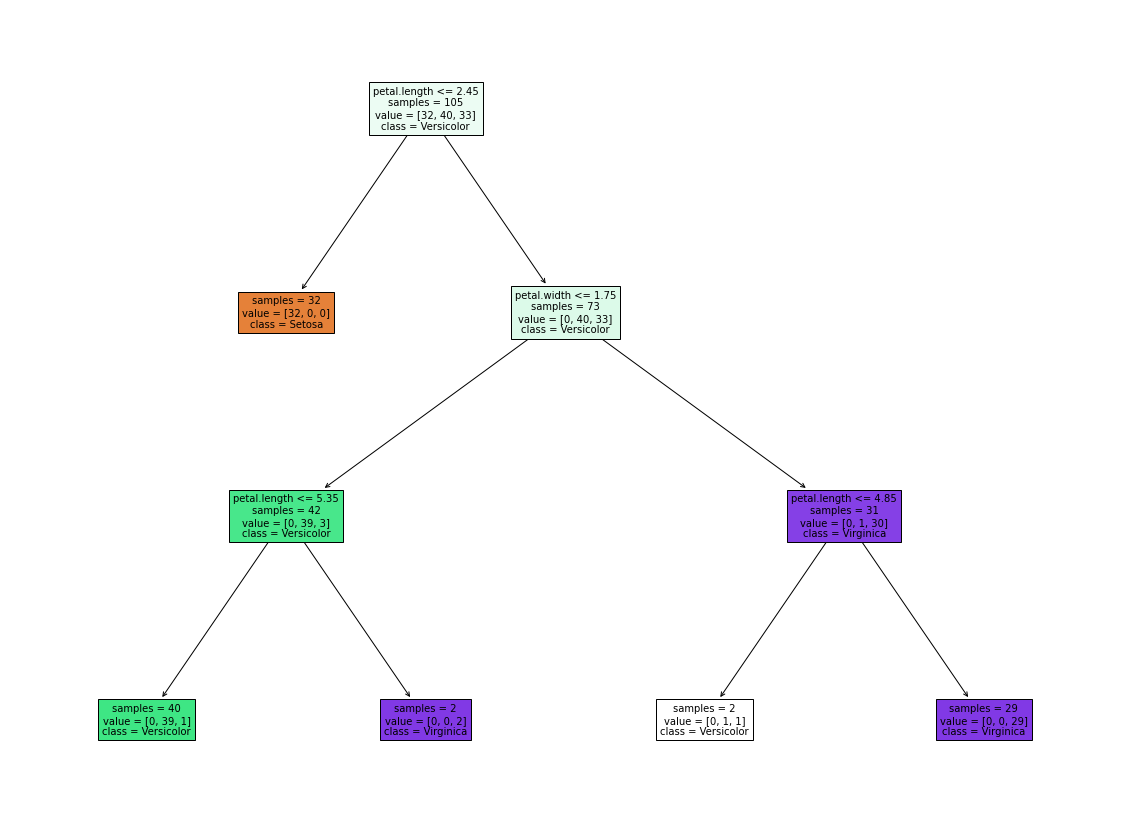

In [40]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree Depth: {model.get_depth()}")
print(f"Number of leaves or terminal nodes: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = labels.tolist(),
            class_names   = ['Setosa', 'Versicolor', 'Virginica'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            ax            = ax
       )

In [41]:
# get the text representation
from sklearn import tree
#text_representation = tree.export_text(model)  # generic features

text_representation = tree.export_text(model, feature_names= list(X_train_prep.columns.values) )



print(text_representation)

|--- petal.length <= 2.45
|   |--- class: Setosa
|--- petal.length >  2.45
|   |--- petal.width <= 1.75
|   |   |--- petal.length <= 5.35
|   |   |   |--- class: Versicolor
|   |   |--- petal.length >  5.35
|   |   |   |--- class: Virginica
|   |--- petal.width >  1.75
|   |   |--- petal.length <= 4.85
|   |   |   |--- class: Versicolor
|   |   |--- petal.length >  4.85
|   |   |   |--- class: Virginica



In [42]:
# Model training error
#-------------------------------------------------------------------------------
predictions_train = model.predict(X = X_train_prep,)

print("Confussion Matrix -- TRAIN")
print("-------------------")
confusion_matrix(
    y_true    = y_train,
    y_pred    = predictions_train
)

Confussion Matrix -- TRAIN
-------------------


array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 31]], dtype=int64)

In [43]:
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_train,
            normalize = True
           )
#print(f"Accuracy in train : {100 * accuracy_train} %")
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))


 Accuracy in train 1s: 98.10 %


In [44]:
# Model test error
#-------------------------------------------------------------------------------
predictions_test = model.predict(X = X_test_prep,)

print("Confussion Matrix -- TEST")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predictions_test
)

Confussion Matrix -- TEST
-------------------


array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  3, 14]], dtype=int64)

In [45]:
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )
#print(f"Accuracy in test 1s: {100 * accuracy_test} %")

print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))



 Accuracy in test 1s: 93.33 %


In [238]:
# Analyzing Pruning
#-------------------------
#SEVERAL METHODS ARE PROPOSED BELOW



In [46]:
# First METHOD COMMON-SENSE selection of alpha based on cost-complexity values

#Obtaining diferent options of alpha values

path = model.cost_complexity_pruning_path(X_train_prep, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [47]:
path

{'ccp_alphas': array([0.        , 0.00890937, 0.0344898 , 0.2729283 , 0.31879725]),
 'impurities': array([0.02809524, 0.03700461, 0.0714944 , 0.3444227 , 0.66321995])}

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

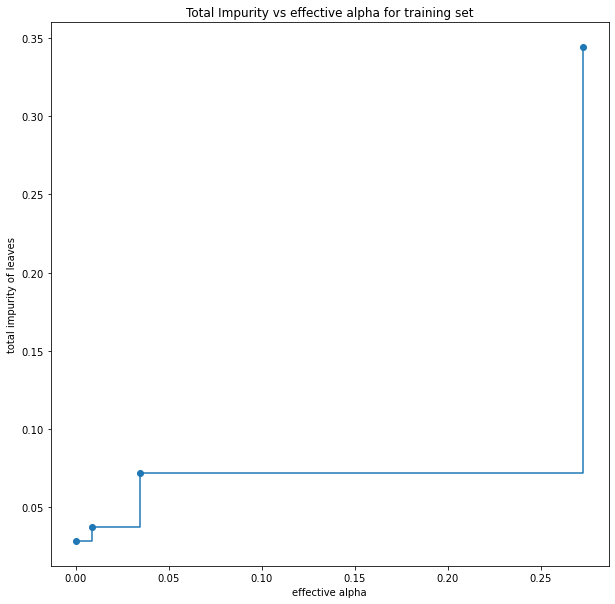

In [48]:
# Representation Impurity vs effective alpha for training set

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [49]:
# Different alpha options are tried
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_prep, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3187972540614418


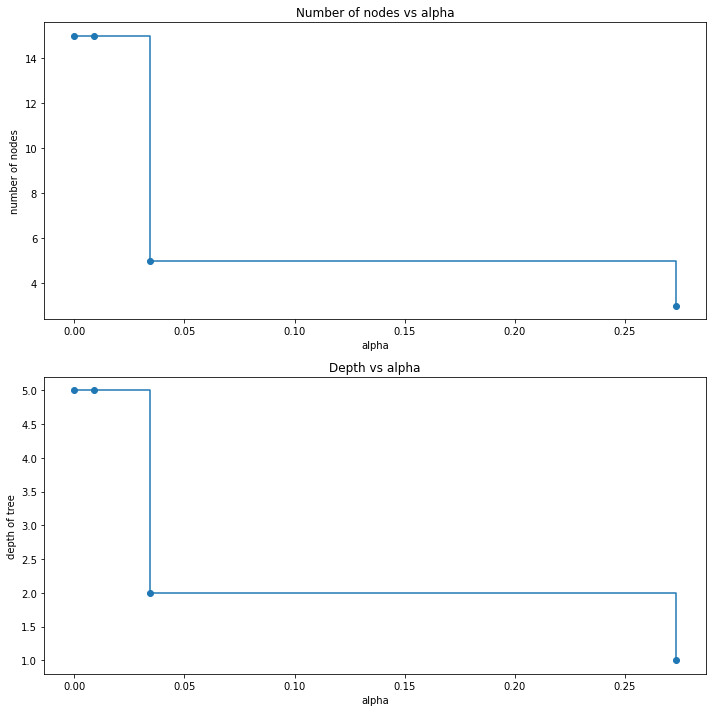

In [50]:
# we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node
# This is not classification

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots( 2, 1, figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

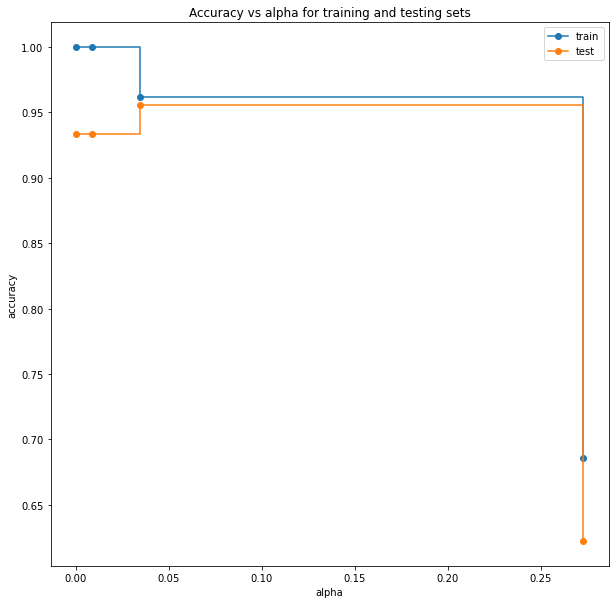

In [51]:
# Cheking scores in training and test datasets for different alphas

train_scores = [clf.score(X_train_prep, y_train) for clf in clfs]
test_scores = [clf.score(X_test_prep, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [52]:
# the scores obtained are now printed and ordered by the best test score

eva_df = pd.DataFrame({'ccp_alphas': ccp_alphas, 'train_scores': train_scores, 'test_scores': test_scores})
eva_df = eva_df.sort_values(['test_scores'], ascending = False)
eva_df.head(10)

,ccp_alphas,train_scores,test_scores
2,0.034490,0.961905,0.955556
0,0.000000,1.000000,0.933333
1,0.008909,1.000000,0.933333
3,0.272928,0.685714,0.622222


In [53]:
# Obtaining the best alpha from the previous list
best_alpha= eva_df.iloc[0][0]

best_alpha


0.03448979591836737

In [54]:
# fit the pruned tree with best alpha
import pydotplus
from dmba import plotDecisionTree, classificationSummary, regressionSummary

prunedtree_I = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0)

prunedtree_I.fit(X_train_prep, y_train)


classificationSummary(y_train, prunedtree_I.predict(X_train_prep))
classificationSummary(y_test, prunedtree_I.predict(X_test_prep))

Confusion Matrix (Accuracy 0.9619)

       Prediction
Actual  0  1  2
     0 32  0  0
     1  0 39  1
     2  0  3 30
Confusion Matrix (Accuracy 0.9556)

       Prediction
Actual  0  1  2
     0 18  0  0
     1  0 10  0
     2  0  2 15


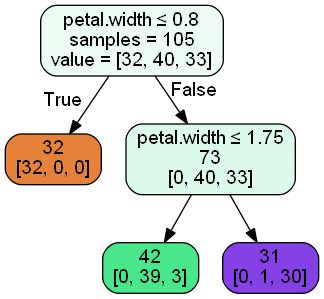

In [56]:

plotDecisionTree(prunedtree_I, feature_names=X_train_prep.columns)

In [ ]:
#  II.  Alternative method using GridSearchCV to fine tune method parameters
#----------------------------------------------------------------------

In [80]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth':[2, 3, 5,6],
    'min_samples_split':[1,2,3,4],
    'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=10, n_jobs=1)
gridSearch.fit(X_train_prep, y_train)

print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.9618181818181819
Initial parameters:  {'max_depth': 3, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}


In [81]:
# Adapt grid based on result from initial grid search
param_grid = {
 'max_depth': list(range(3,4,5)), 
 'min_samples_split': list(range(2, 3)), 
 'min_impurity_decrease': [x/10000 for x in range(1, 900, 100)], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=10, n_jobs=-1)
gridSearch.fit(X_train_prep, y_train)

print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved score:  0.9618181818181819
Improved parameters:  {'max_depth': 3, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}


In [82]:
# fit the final model with best parameters: {'max_depth': 8, 'min_impurity_decrease': 0.0001, 'min_samples_split': 21}

# prunedtree = gridSearch.best_estimator_
# or:
prunedtree_II = DecisionTreeClassifier(random_state = 1, max_depth=8, min_impurity_decrease=0.0001, min_samples_split=21)
prunedtree_II.fit(X_train_prep, y_train)

classificationSummary(y_train, prunedtree_II.predict(X_train_prep))
classificationSummary(y_test, prunedtree_II.predict(X_test_prep))

Confusion Matrix (Accuracy 0.9810)

       Prediction
Actual  0  1  2
     0 32  0  0
     1  0 40  0
     2  0  2 31
Confusion Matrix (Accuracy 0.9333)

       Prediction
Actual  0  1  2
     0 18  0  0
     1  0 10  0
     2  0  3 14


In [83]:
# Final pruned tree
# ------------------------------------------------------------------------------
#model_final = grid.best_estimator_
print(f" Tree Depth: {prunedtree_II.get_depth()}")
print(f"Number of terminal nodes: {prunedtree_II.get_n_leaves()}")

 Tree Depth: 4
Number of terminal nodes: 6


In [84]:
# Error de test del modelo final
#-------------------------------------------------------------------------------
predictions = prunedtree_II.predict(X = X_test_prep)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions,
            normalize = True
           )
print(f" TEST accuracy: {100 * accuracy} %")

 TEST accuracy: 93.33333333333333 %


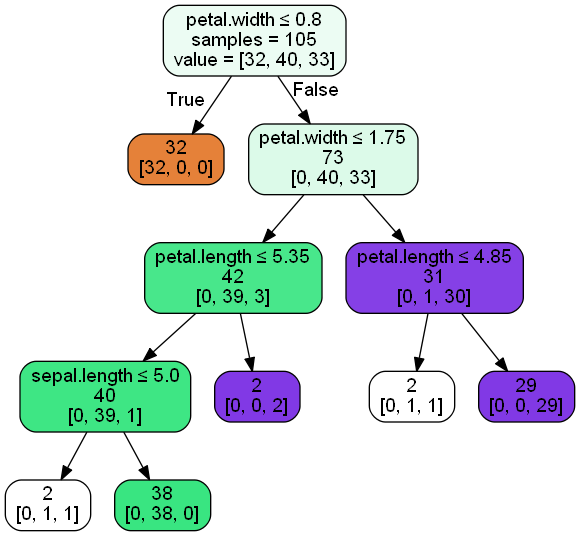

In [85]:
plotDecisionTree(prunedtree_II, feature_names=X_test_prep.columns)

In [86]:
# METHOD:  prune the tree with cost complexity pruning - Cross Validation

In [88]:
from sklearn.model_selection import cross_val_score

# fit the tree
fulltree = DecisionTreeClassifier(random_state=2)
fulltree.fit(X_train_prep, y_train)


path = fulltree.cost_complexity_pruning_path(X_train_prep, y_train)
alphas, impurities = path.ccp_alphas, path.impurities

mean, std = [], []
for i in alphas:
    tree = DecisionTreeClassifier(ccp_alpha=i, random_state=0)
#     cross validation for each alpha value
    scores = cross_val_score(tree, X_train_prep, y_train, cv=5)
    mean.append(scores.mean())
    std.append(scores.std())
# keep a record of the values of alpha, mean, standard deviation
eva_df = pd.DataFrame({'alpha': alphas, 'mean': mean, 'std': std})
eva_df = eva_df.sort_values(['mean'], ascending = False)
eva_df.head(10)

,alpha,mean,std
0,0.000000,0.933333,0.071270
1,0.009217,0.933333,0.071270
2,0.009286,0.933333,0.071270
3,0.034490,0.923810,0.071270
4,0.272928,0.800000,0.097124
5,0.318797,0.638095,0.139971


In [89]:
# fit the pruned tree - cv
prunedtree_cv = DecisionTreeClassifier(ccp_alpha=eva_df.iloc[1, 0], random_state=0)
prunedtree_cv.fit(X_train_prep, y_train)

classificationSummary(y_train, prunedtree_cv.predict(X_train_prep))
classificationSummary(y_test, prunedtree_cv.predict(X_test_prep))

Confusion Matrix (Accuracy 0.9905)

       Prediction
Actual  0  1  2
     0 32  0  0
     1  0 39  1
     2  0  0 33
Confusion Matrix (Accuracy 0.9556)

       Prediction
Actual  0  1  2
     0 18  0  0
     1  0 10  0
     2  0  2 15


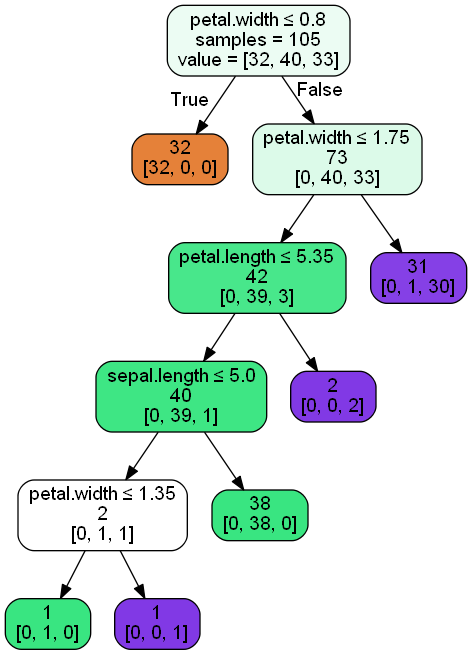

In [90]:
plotDecisionTree(prunedtree_cv, feature_names=X_train_prep.columns)

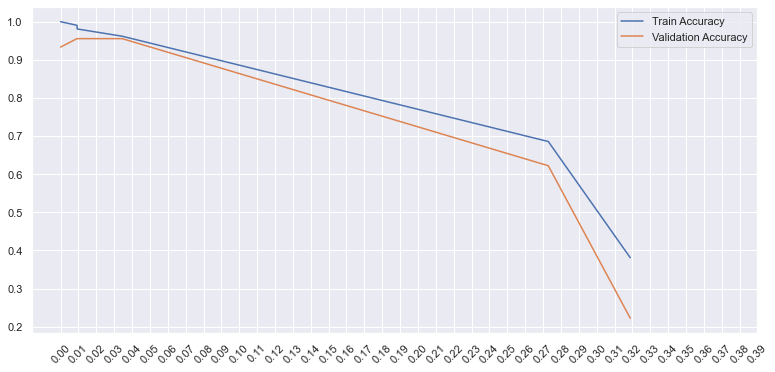

In [93]:
# Tree pruning without cross validation
accuracy_train, accuracy_val = [], []
clfs = []
    
for i in alphas:
    tree = DecisionTreeClassifier(ccp_alpha=i, random_state=0)
    tree.fit(X_train_prep, y_train)
    clfs.append(tree)
    
    train_y_pred = tree.predict(X_train_prep)
    val_y_pred = tree.predict(X_test_prep)
    accuracy_train.append(accuracy_score(y_train, train_y_pred))
    accuracy_val.append(accuracy_score(y_test, val_y_pred))

sns.set()
plt.figure(figsize=(13, 6))
sns.lineplot(y = accuracy_train, x = alphas, label = 'Train Accuracy')
sns.lineplot(y = accuracy_val, x = alphas, label = 'Validation Accuracy')
plt.xticks(ticks = np.arange(0, 0.4, 0.01), rotation = 45)
plt.show()

In [94]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

eva_df2 = pd.DataFrame({'alpha': alphas, 'node_counts':node_counts, 'depth': depth,
                       'acc_train':accuracy_train, 'acc_val':accuracy_val,
                      'acc_diff': np.array(accuracy_train) - np.array(accuracy_val)})
eva_df2.sort_values(by = ['acc_val', 'node_counts'], ascending = False).iloc[:10,:]

,alpha,node_counts,depth,acc_train,acc_val,acc_diff
1,0.009217,11,5,0.990476,0.955556,0.034921
2,0.009286,7,3,0.980952,0.955556,0.025397
3,0.034490,5,2,0.961905,0.955556,0.006349
0,0.000000,15,5,1.000000,0.933333,0.066667
4,0.272928,3,1,0.685714,0.622222,0.063492
5,0.318797,1,0,0.380952,0.222222,0.158730


In [95]:
# fit the pruned tree - non cv
# Selecting case with minimum difference value 

prunedtree_III = DecisionTreeClassifier(ccp_alpha=eva_df2.iloc[1, 0], random_state=0)
prunedtree_III.fit(X_train_prep, y_train)

classificationSummary(y_train, prunedtree_III.predict(X_train_prep))
classificationSummary(y_test, prunedtree_III.predict(X_test_prep))

Confusion Matrix (Accuracy 0.9905)

       Prediction
Actual  0  1  2
     0 32  0  0
     1  0 39  1
     2  0  0 33
Confusion Matrix (Accuracy 0.9556)

       Prediction
Actual  0  1  2
     0 18  0  0
     1  0 10  0
     2  0  2 15


In [96]:
# Final pruned tree
# ------------------------------------------------------------------------------
#model_final = grid.best_estimator_
print(f" Tree Depth: {prunedtree_III.get_depth()}")
print(f"Number of terminal nodes: {prunedtree_III.get_n_leaves()}")

 Tree Depth: 5
Number of terminal nodes: 6


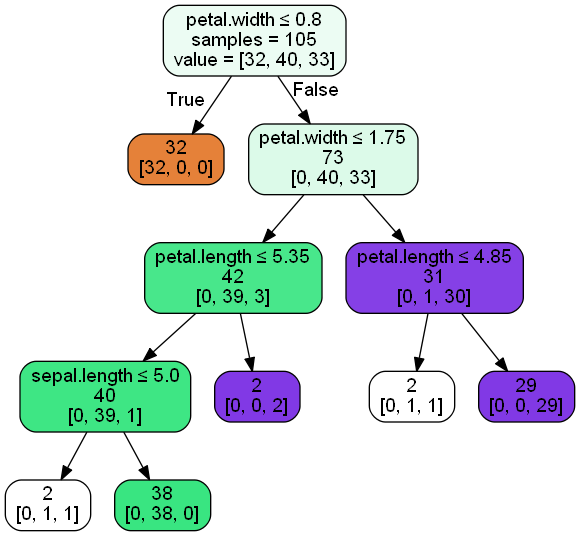

In [97]:
# Implementation
# By comparing the accuracy results from the  evaluations, the last one is selected
# Now fit a model with all the data we have so that it's more robust
tree_final = DecisionTreeClassifier(random_state = 1, max_depth=8, min_impurity_decrease=0.0001, min_samples_split=22)
tree_final.fit(X_train_prep, y_train)
plotDecisionTree(tree_final, feature_names = X_train_prep.columns)

In [98]:
print("Importance of predictors ")
print("-------------------------------------------")
importance_predictors = pd.DataFrame(
                            {'predictor': labels.tolist(),
                             'importance': tree_final.feature_importances_}
                            )
importance_predictors.sort_values('importance', ascending=False)

Importance of predictors 
-------------------------------------------


,predictor,importance
3,petal.width,0.918583
2,petal.length,0.067372
0,sepal.length,0.014045
1,sepal.width,0.000000


In [101]:
# Prediction of probabilities
#-------------------------------------------------------------------------------
predictions = tree_final.predict_proba(X = X_test_prep)
predictions[:20, :]

array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])